In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generator/")
import environments

import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats
import stats

from tqdm import tqdm
import analysis_tools

In [2]:
path = f"../VPC_l1_10_l2_1_stateful"
model, params = analysis_tools.load_model(path) # model of interest

## Elongation experiment

In [3]:
sequence = ["square", "square"]
a = np.linspace(-1, 1, 32)
b = np.linspace(-1, 1, 32)
bins =  [[a, b] for i in range(len(sequence))]# extra bins for rectangular environment, x-direction!

In [4]:
x, r, v, c = analysis_tools.test_dataset(sequence, timesteps = 10000, context = params["context"]) # create dataset

In [5]:
dataset = [((x[0][i,None], x[1][i,None]), x[1][i,None]) for i in range(len(sequence))] # repackage
gs, ps, centers, preds, metrics = model.inference(dataset)

burn_in = 500
ps = ps[:,burn_in:]
r = r[:,burn_in:]

In [6]:
p_ratemaps = stats.population_vector_ratemaps(ps, r, bins, smooth = False)

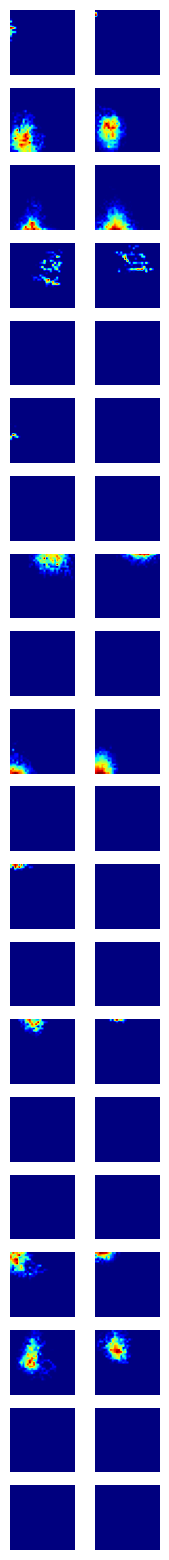

In [7]:
analysis_tools.plot_sequence(p_ratemaps, show_units = 20);

In [8]:
# And to look for field splitting, we stretch the box even further!

In [9]:
scale = 2
env = environments.Environments()
env.envs["rectangle"]= env.envs["rectangle"]*np.array([scale, 1])[None,None]
sequence = ["square", "rectangle"]

a = np.linspace(-1.5*scale, 1.5*scale, int(1.5*scale*32))
b = np.linspace(-1, 1, 32)
stretch_bins = [[a,a] for i in range(len(sequence))] # extra bins for rectangular environment, x-direction!


#stretch_bins = [64, 64]


In [10]:
# swap context signals
x, r, v, c = analysis_tools.test_dataset(sequence, timesteps = 100000, context = params["context"], env = env) # create dataset
backup_square = torch.clone(x[0][0,:,2:])
x[0][-1,:,2:] = backup_square

dataset = [((x[0][i,None], x[1][i,None]), x[1][i,None]) for i in range(len(sequence))] # repackage
gs, ps, centers, preds, metrics = model.inference(dataset)

In [11]:
p_ratemaps = stats.population_vector_ratemaps(ps, r, stretch_bins, smooth = False)
g_ratemaps = stats.population_vector_ratemaps(gs, r, stretch_bins, smooth = False)

In [12]:
analysis_tools.plot_sequence(p_ratemaps, show_units =10, pane_size = 1, scale = "individual");

TypeError: plot_sequence() got an unexpected keyword argument 'scale'

In [ ]:
scale = 1
env = environments.Environments()
env.envs["rectangle"]= np.array([[[-1.5, -1], [1.5, -1.5]], [[1.5, -1.5], [1.5, 1.5]], [[1.5, 1.5], [-1.5, 1]], [[-1.5,1],[-1.5,-1]]])
sequence = ["square", "rectangle"]

for wall in env.envs["rectangle"]:
    plt.plot(*wall.T, "k-")


In [ ]:
# swap context signals
x, r, v, c = analysis_tools.test_dataset(sequence, timesteps = 100000, context = params["context"], env = env) # create dataset
backup_square = torch.clone(x[0][0,:,2:])
x[0][-1,:,2:] = backup_square

dataset = [((x[0][i,None], x[1][i,None]), x[1][i,None]) for i in range(len(sequence))] # repackage
gs, ps, centers, preds, metrics = model.inference(dataset)

In [ ]:
p_ratemaps = stats.population_vector_ratemaps(ps, r, stretch_bins, smooth = False)
g_ratemaps = stats.population_vector_ratemaps(gs, r, stretch_bins, smooth = False)

In [ ]:
analysis_tools.plot_sequence(p_ratemaps, show_units =30, pane_size = 1);